<a href="https://colab.research.google.com/github/denisedacunhasilva/M1S06_projeto/blob/main/mini_projeto_clamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Entendimento do Projeto e Importação dos Dados

Descrição:

1.1 Leia o enunciado do projeto e compreenda o contexto de negócio.

Estudo de análise de dados para explorar, tratar e visualizar os dados para identificar padrões, anomalias e tendências para apoiar decisões estratégicas sobre qualidade de atendimento, custo e eficiência operacional.


1.2 Carregue o arquivo healthcare_dataset.csv utilizando a biblioteca Pandas.
    Carregado arquivo no Dataframe df.

In [ ]:
# Importação das bibliotecas necessárias para todo o mini projeto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/healthcare_dataset.csv', sep=',', encoding='UTF-8')


1.3.1 Realize uma exploração inicial (5 primeiras linhas).

In [ ]:
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

1.3.2 Realize uma exploração inicial (tipos de dados e dimensões).
      O Dataset possui 15 colunas, dados do tipo: float64(1), int64(2), object(12).

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

1.3.3 Realize uma exploração inicial (informações estatísticas)
      Nas informações estatística foi identificado a existência de valor de cobrança negativo. No item 3.5 será verificado quantos registros há com esta coluna negativa e feita análise para tratamento.

In [ ]:
estatistica_descritiva = df.describe()
print(estatistica_descritiva)

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


2 - Limpeza e Preparação dos Dados

2.1 Verifique e trate valores ausentes (NA, NaN).
    
    Identificado que não há valores ausentes.

In [ ]:
df_nulo = df.isna().sum()
print('Detecção e tratamento de valores nulos:')
print(' ')
print(df_nulo)

if df_nulo.sum() == 0:
    print(' ')
    print('Não há valores nulos no DataFrame.')
elif df_nulo.sum() > 0:
    print(' ')
    print('Há valores nulos no DataFrame.')
    print(' ')
    print('Tratamento dos valores nulos:')
    print(' ')
    #Tratamento de dados ausentes
    df.fillna({'Name':'Não Informado'}, inplace=True)
    df.fillna({'Hospital':'Não Informado'}, inplace=True)

    #errors='raise' --> dispara uma exceção
    #errors='coerce' --> converte o dado para NaN
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df.fillna({'Age': df['Age'].mean().round()}, inplace=True)


Detecção e tratamento de valores nulos:
 
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
 
Não há valores nulos no DataFrame.


2.2 Remova registros duplicados, se existirem
    
    Foram identificados registros duplicados, um total de 534 registros foram eliminados devido ser a segunda ocorrência.

In [ ]:
#verificar quais são os registros duplicaedos
duplicados = df[df.duplicated(keep='first')]
print(' ')
print('\nRegistros duplicados encontrados (segunda ocorrência em diante):')
print(duplicados)

if duplicados is not None:
    df_sem_duplicados = df.drop_duplicates(keep='first')
    print(' ')
    print('DataFrame após remoção de duplicados:')
    display(df_sem_duplicados)

 

Registros duplicados encontrados (segunda ocorrência em diante):
                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
# Contar o total de registros duplicados
total_duplicados = df.duplicated(subset=['Name', 'Date of Admission']).sum()

# Exibir o resultado
print(f"O número de registros duplicados é: {total_duplicados}")


# Duplicatas apenas por Nome e Data de Admissão
df_sem_duplicados = df_sem_duplicados.drop_duplicates(subset=['Name', 'Date of Admission'], keep='first')
print(' ')
print('DataFrame após remoção de duplicados (Nome e Data de Admissão):')
display(df_sem_duplicados)



O número de registros duplicados é: 5500
 
DataFrame após remoção de duplicados (Nome e Data de Admissão):


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,JOSepH PaUl,64,Male,O+,Hypertension,2022-06-28,Arthur Fleming,"and Williams, Brown Mckenzie",Blue Cross,24747.348916,256,Emergency,2022-07-09,Paracetamol,Inconclusive
49996,braDleY dAniEL,69,Male,B+,Cancer,2020-04-04,Mark Moore,Wise Ltd,Medicare,40657.582493,463,Elective,2020-04-17,Aspirin,Abnormal
49997,LiSa sIMPsoN,73,Male,O-,Cancer,2023-09-08,Deborah Sutton,"Moreno Murphy, Griffith and",Blue Cross,8441.147064,411,Elective,2023-09-22,Aspirin,Abnormal
49998,RoGER farRELl,81,Male,B-,Cancer,2020-10-13,Mary Bartlett,Sons Smith and,Blue Cross,34934.284113,144,Elective,2020-10-14,Penicillin,Abnormal


2.3 Identifique outliers em colunas numéricas relevantes (ex: idade, custo, tempo de internação).
    Não foram identificados outliers, seja de tempo de internação, idade ou valor de cobrança. Para verificar outlioers de tempo de internação foi criada a coluna Length of Stay no Dataset.

In [ ]:
df_clean = df_sem_duplicados.copy()
df_clean['Date of Admission'] = pd.to_datetime(df_clean['Date of Admission'])
df_clean['Discharge Date'] = pd.to_datetime(df_clean['Discharge Date'])
df_clean['Length of Stay'] = (df_clean['Discharge Date'] - df_clean['Date of Admission']).dt.days
print(' ')
print('Coluna Length of Stay adicionada:')
print(df_clean[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

#Função para identificar e filtrar outliers em uma coluna numérica relevante
# (ex: Age, Billing Amount, Date of Admission, Discharge Date) com intervalo interquartil (IQR).
def outlier_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = dataframe[
        (dataframe[column] < lower_bound) |
        (dataframe[column] > upper_bound)
    ]
    return outliers

#Chamar a função para identificar outliers na coluna 'Age'
outliers_age = outlier_iqr(df_clean, 'Age')
print(' ')
print('Outliers na coluna Age:')
print(outliers_age)

#Chamar a função para identificar outliers na coluna 'Length of Stay'
outliers_length_of_stay = outlier_iqr(df_clean, 'Length of Stay')
print(' ')
print('Outliers na coluna Length of Stay:')
print(outliers_length_of_stay)

#Chamar a função para identificar outliers na coluna 'Billing Amount'
outliers_billing = outlier_iqr(df_clean, 'Billing Amount')
print(' ')
print('Outliers na coluna Billing Amount:')
print(outliers_billing)

 
Coluna Length of Stay adicionada:
  Date of Admission Discharge Date  Length of Stay
0        2024-01-31     2024-02-02               2
1        2019-08-20     2019-08-26               6
2        2022-09-22     2022-10-07              15
3        2020-11-18     2020-12-18              30
4        2022-09-19     2022-10-09              20
 
Outliers na coluna Age:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Length of Stay]
Index: []
 
Outliers na coluna Length of Stay:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Length of Stay]
Index: []
 
Outliers na coluna Billing Amount:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical C

In [ ]:
df_clean = df_sem_duplicados.copy()
df_clean['Date of Admission'] = pd.to_datetime(df_clean['Date of Admission'])
df_clean['Discharge Date'] = pd.to_datetime(df_clean['Discharge Date'])
df_clean['Length of Stay'] = (df_clean['Discharge Date'] - df_clean['Date of Admission']).dt.days
print(' ')
print('Coluna Length of Stay adicionada:')
print(df_clean[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

#Função para identificar e filtrar outliers em uma coluna numérica relevante
# (ex: Age, Billing Amount, Date of Admission, Discharge Date) com intervalo interquartil (IQR).
def outlier_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = dataframe[
        (dataframe[column] < lower_bound) |
        (dataframe[column] > upper_bound)
    ]
    return outliers

#Chamar a função para identificar outliers na coluna 'Age'
outliers_age = outlier_iqr(df_clean, 'Age')
print(' ')
print('Outliers na coluna Age:')
print(outliers_age)

#Chamar a função para identificar outliers na coluna 'Length of Stay'
outliers_length_of_stay = outlier_iqr(df_clean, 'Length of Stay')
print(' ')
print('Outliers na coluna Length of Stay:')
print(outliers_length_of_stay)

#Chamar a função para identificar outliers na coluna 'Billing Amount'
outliers_billing = outlier_iqr(df_clean, 'Billing Amount')
print(' ')
print('Outliers na coluna Billing Amount:')
print(outliers_billing)

 
Coluna Length of Stay adicionada:
  Date of Admission Discharge Date  Length of Stay
0        2024-01-31     2024-02-02               2
1        2019-08-20     2019-08-26               6
2        2022-09-22     2022-10-07              15
3        2020-11-18     2020-12-18              30
4        2022-09-19     2022-10-09              20
 
Outliers na coluna Age:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Length of Stay]
Index: []
 
Outliers na coluna Length of Stay:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Length of Stay]
Index: []
 
Outliers na coluna Billing Amount:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical C

2.4 Caso existam colunas categóricas com inconsistências (ex: “Male”, “male”, “M”), padronize-as

    Foram analisadas as categorias: Gender, Blood Type, Medical Condition, Admission Type e Test Results, não foi identificada nenhuma inconsistência.

In [ ]:
print(' ')
print('Categoria original antes da padronização:')
print(df_clean['Gender'].unique())
print(df_clean['Gender'].value_counts())

print(' ')
print('Categoria original antes da padronização:')
print(df_clean['Blood Type'].unique())
print(df_clean['Blood Type'].value_counts())

print(' ')
print('Categoria original antes da padronização:')
print(df_clean['Medical Condition'].unique())
print(df_clean['Medical Condition'].value_counts())

print(' ')
print('Categoria original antes da padronização:')
print(df_clean['Admission Type'].unique())
print(df_clean['Admission Type'].value_counts())

print(' ')
print('Categoria original antes da padronização:')

print(df_clean['Test Results'].unique())
print(df_clean['Test Results'].value_counts())

#Padronizar os valores da coluna
# 1. Converter para minúsculas
df_clean['Gender'] = df_clean['Gender'].str.lower()
df_clean['Blood Type'] = df_clean['Blood Type'].str.lower()
df_clean['Medical Condition'] = df_clean['Medical Condition'].str.lower()
df_clean['Admission Type'] = df_clean['Admission Type'].str.lower()
df_clean['Test Results'] = df_clean['Test Results'].str.lower()

# 2. Remover espaços em branco
df_clean['Gender'] = df_clean['Gender'].str.strip()
df_clean['Blood Type'] = df_clean['Blood Type'].str.strip()
df_clean['Medical Condition'] = df_clean['Medical Condition'].str.strip()
df_clean['Admission Type'] = df_clean['Admission Type'].str.strip()
df_clean['Test Results'] = df_clean['Test Results'].str.strip()


# 3. Capitalizar a primeira letra
df_clean['Gender'] = df_clean['Gender'].str.capitalize()
df_clean['Blood Type'] = df_clean['Blood Type'].str.capitalize()
df_clean['Medical Condition'] = df_clean['Medical Condition'].str.capitalize()
df_clean['Admission Type'] = df_clean['Admission Type'].str.capitalize()
df_clean['Test Results'] = df_clean['Test Results'].str.capitalize()

print(' ')
print("\nDataFrame Padronizado (usando métodos de string):")
print(df_clean['Gender'].unique())
print(df_clean['Gender'].value_counts())
print(' ')
print(df_clean['Blood Type'].unique())
print(df_clean['Blood Type'].value_counts())
print(' ')
print(df_clean['Medical Condition'].unique())
print(df_clean['Medical Condition'].value_counts())
print(' ')
print(df_clean['Admission Type'].unique())
print(df_clean['Admission Type'].value_counts())
print(' ')
print(df_clean['Test Results'].unique())
print(df_clean['Test Results'].value_counts())

 
Categoria original antes da padronização:
['Male' 'Female']
Gender
Female    25011
Male      24989
Name: count, dtype: int64
 
Categoria original antes da padronização:
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64
 
Categoria original antes da padronização:
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64
 
Categoria original antes da padronização:
['Urgent' 'Emergency' 'Elective']
Admission Type
Elective     16827
Urgent       16784
Emergency    16389
Name: count, dtype: int64
 
Categoria original antes da padronização:
['Normal' 'Inconclusive' 'Abnormal']
Test Results
Abnormal        16772
Normal          16684
Inconclusive    16544
Name: count, dtype: int64
 

DataF

2.5 No item 1.3.3 foram encontrados 106 registros com a coluna 'Billing Amount', valor cobrado, negativos. Coloco abaixo sugestão de tratamentos para estes registros negativos, porém não os tratei devido não ter informações do negócio suficientes para tratá-los, valores negativos podem ser relacionadas a débitos e créditos para resultar em  um saldo final.

In [ ]:
#Quantos registros negativos há no Dataset:]
registros_negativos = df_clean[df_clean['Billing Amount'] < 0]
print(f"Quantidade de registros com valores negativos: {len(registros_negativos)}")
print(f"Percentual em relação ao total: {(len(registros_negativos) / len(df_clean) * 100):.2f}%")
print("\nExemplo de registros com anomalia")
registros_negativos.head(3)


#  2.5.1 - Substituir os registros com 'Billing Amount' negativo pela média de 'Billing Amount' > 0:
media_billing = df_clean[df_clean['Billing Amount'] > 0]['Billing Amount'].mean()
print(media_billing)

df_clean.loc[df_clean['Billing Amount'] < 0, 'Billing Amount'] = media_billing
print(' ')
print('Média de Billing Amount > 0:')
print(media_billing)

# 2.5.2 Outra opção de tratamento seria substituir o 'Billing Amount' pelo valor absoluto, sem o sinal negativo:

# Usando a função abs() para obter o valor absoluto
#df_clean['Billing Amount'] = df_clean['Billing Amount'].abs()

#print("\nDataFrame com valores absolutos (negativos convertidos para positivos):")
#print(df_clean)


Quantidade de registros com valores negativos: 96
Percentual em relação ao total: 0.19%

Exemplo de registros com anomalia
25605.807715371768
 
Média de Billing Amount > 0:
25605.807715371768


3 - Análise Exploratória e Estatísticas Descritivas

3.1 Utilize funções do Pandas e Numpy para obter: Média, mediana e desvio padrão de variáveis numéricas.



In [ ]:
media_idade = df_clean['Age'].mean()
mediana_idade = df_clean['Age'].median()
desvio_padrao_idade = df_clean['Age'].std()
print(' ')
print(f'Média da Idade: {media_idade}')
print(f'Mediana da Idade: {mediana_idade}')
print(f'Desvio Padrão da Idade: {desvio_padrao_idade}')

media_billing = df_clean['Billing Amount'].mean()
mediana_billing = df_clean['Billing Amount'].median()
desvio_padrao_billing = df_clean['Billing Amount'].std()
print(' ')
print(f'Média do Billing Amount: {media_billing}')
print(f'Mediana do Billing Amount: {mediana_billing}')
print(f'Desvio Padrão do Billing Amount: {desvio_padrao_billing}')

 
Média da Idade: 51.58036
Mediana da Idade: 52.0
Desvio Padrão da Idade: 19.582194246738407
 
Média do Billing Amount: 25605.80771537177
Mediana do Billing Amount: 25605.807715371768
Desvio Padrão do Billing Amount: 14169.92340669181


3.2 Utilize funções do Pandas e Numpy para obter: Distribuição de frequências para variáveis categóricas.
    Feita a distribuição de frequências para: Gênero, tipo sanguíneo, condição médica, tipo admissão e resultado de teste.


In [ ]:
genero_counts_gender = df_clean['Gender'].value_counts()
print(' ')
print('Distribuição de Frequências - Gênero:')
print(genero_counts_gender)
blood_type_counts = df_clean['Blood Type'].value_counts()
print(' ')
print('Distribuição de Frequências - Blood Type:')
print(blood_type_counts)
medical_condition_counts = df_clean['Medical Condition'].value_counts()
print(' ')
print('Distribuição de Frequências - Medical Condition:')
print(medical_condition_counts)
admission_type_counts = df_clean['Admission Type'].value_counts()
print(' ')
print('Distribuição de Frequências - Admission Type:')
print(admission_type_counts)
test_results_counts = df_clean['Test Results'].value_counts()
print(' ')
print('Distribuição de Frequências - Test Results:')
print(test_results_counts)


 
Distribuição de Frequências - Gênero:
Gender
Female    25011
Male      24989
Name: count, dtype: int64
 
Distribuição de Frequências - Blood Type:
Blood Type
Ab+    6291
B+     6278
A-     6261
Ab-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64
 
Distribuição de Frequências - Medical Condition:
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64
 
Distribuição de Frequências - Admission Type:
Admission Type
Elective     16827
Urgent       16784
Emergency    16389
Name: count, dtype: int64
 
Distribuição de Frequências - Test Results:
Test Results
Abnormal        16772
Normal          16684
Inconclusive    16544
Name: count, dtype: int64


3.2 Identifique possíveis correlações entre variáveis (ex: idade x custo do tratamento).
Utilizado o método de Pearson para identificar se há correlação entre idade e custo do tratamento e concluiu-se que a correlação é fraca ou inexistente.


O coeficiente de correlação (Pearson) entre idade e custo do tratamento é: -0.00
A correlação é fraca ou inexistente.


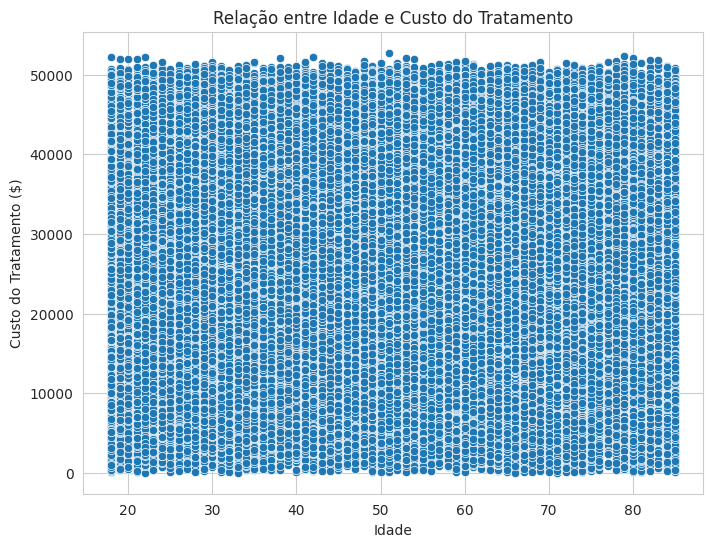

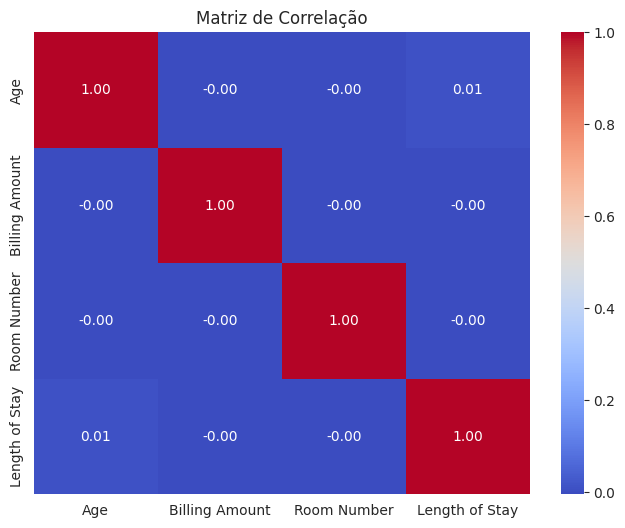

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas antes de calcular a correlação
numeric_cols = df_clean.select_dtypes(include=np.number)

# Cálculo do coeficiente de correlação de Pearson
# O método .corr() do pandas calcula a matriz de correlação para todas as colunas numéricas.
matriz_correlacao = numeric_cols.corr(method='pearson')

# Para obter a correlação entre duas variáveis específicas:
correlacao_idade_custo = numeric_cols['Age'].corr(numeric_cols['Billing Amount'])

print(f"O coeficiente de correlação (Pearson) entre idade e custo do tratamento é: {correlacao_idade_custo:.2f}")

# 3. Interpretação do resultado
if correlacao_idade_custo > 0.7:
    print("Há uma forte correlação positiva, indicando que, em geral, pacientes mais velhos tendem a ter custos de tratamento mais altos.")
elif correlacao_idade_custo > 0.3:
    print("Há uma correlação moderada positiva.")
elif correlacao_idade_custo > -0.3:
    print("A correlação é fraca ou inexistente.")
else:
    print("Há uma correlação negativa (incomum neste contexto, mas possível).")

# 4. Visualização da correlação (opcional, mas altamente recomendado)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Billing Amount', data=df_clean)
plt.title('Relação entre Idade e Custo do Tratamento')
plt.xlabel('Idade')
plt.ylabel('Custo do Tratamento ($)')
plt.show()

# Visualização da matriz de correlação completa com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

3.3.1 Crie agregações com groupby, por exemplo: Média de custo por tipo de tratamento.

In [ ]:
# Agrupar o custo do tratamento por idade e ordenar os resultados por média de forma decrescente:
grouped_billing_by_age = df_clean.groupby('Age')['Billing Amount'].mean().sort_values(ascending=False).round(2)
print(' ')
print('Custo médio do tratamento agrupado por Idade (ordem decrescente):')
print(grouped_billing_by_age)

#Calcular a média de custo por tipo de tratamento e ordenar os resultados por média de forma decrescente:
grouped_billing_by_treatment = df_clean.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False).round(2)
print(' ')
print('Custo médio do tratamento agrupado por Tipo de Tratamento (ordem decrescente de custo):')
print(grouped_billing_by_treatment) # Adicionado para exibir o resultado

 
Custo médio do tratamento agrupado por Idade (ordem decrescente):
Age
38    26908.75
57    26774.08
45    26763.67
62    26542.66
18    26356.85
        ...   
82    24802.29
46    24717.83
24    24555.98
51    24395.40
41    24365.61
Name: Billing Amount, Length: 68, dtype: float64
 
Custo médio do tratamento agrupado por Tipo de Tratamento (ordem decrescente de custo):
Medical Condition
Obesity         25837.56
Asthma          25738.13
Diabetes        25710.27
Hypertension    25550.53
Arthritis       25514.12
Cancer          25285.28
Name: Billing Amount, dtype: float64


In [ ]:
#a partir do df_clean, em python, escrever código para exibir faturamento total por ano

import pandas as pd

# Supondo que df_clean já está carregado.
# Exemplo de como carregar (substitua 'seuarquivo.csv' pelo nome do seu arquivo, se necessário):
# df_clean = pd.read_csv('seuarquivo.csv')

# 1. Garantir que a coluna de data esteja no formato datetime
# Substitua 'Data_Venda' pelo nome real da sua coluna de data, se for diferente
df_clean['Discharge Date'] = pd.to_datetime(df_clean['Discharge Date'])

# 2. Extrair o ano para uma nova coluna
df_clean['Year'] = df_clean['Discharge Date'].dt.year

# 3. Agrupar por ano e somar a coluna de faturamento
# Substitua 'Faturamento' pelo nome real da sua coluna de faturamento
faturamento_por_ano = df_clean.groupby('Year')['Billing Amount'].sum().reset_index()

# Exibir o resultado
print("Faturamento Total por Ano:")
print(faturamento_por_ano)


Faturamento Total por Ano:
   Year  Billing Amount
0  2019    1.608064e+08
1  2020    2.581006e+08
2  2021    2.536113e+08
3  2022    2.542864e+08
4  2023    2.551012e+08
5  2024    9.838449e+07


3.3.2 Crie agregações com groupby, por exemplo: Quantidade de pacientes por gênero e seguradora/hospital.


In [ ]:
#Quantidade de 'Name' por 'Gender' e 'Insurance Provider':
print(' ')
contagem_pacientes = df_clean.groupby(['Insurance Provider', 'Gender']).size().unstack(fill_value=0)
print("--- Quantidade de pacientes por gênero e provedor de seguros ---")
print(contagem_pacientes)

print(' ')
contagem_vc = df_clean.groupby(['Insurance Provider', 'Gender'])['Gender'].value_counts()
print("--- Quantidade de pacientes por gênero e provedor de seguros ---")
print(contagem_vc)


 
--- Quantidade de pacientes por gênero e provedor de seguros ---
Gender              Female  Male
Insurance Provider              
Aetna                 4857  4991
Blue Cross            5042  4959
Cigna                 5060  5031
Medicare              5030  5028
UnitedHealthcare      5022  4980
 
--- Quantidade de pacientes por gênero e provedor de seguros ---
Insurance Provider  Gender
Aetna               Female    4857
                    Male      4991
Blue Cross          Female    5042
                    Male      4959
Cigna               Female    5060
                    Male      5031
Medicare            Female    5030
                    Male      5028
UnitedHealthcare    Female    5022
                    Male      4980
Name: count, dtype: int64


4 - Transformações e Enriquecimento dos Dados

4.1 Crie novas colunas derivadas utilizando funções lambda.Exemplo: classificar pacientes em faixas etárias (jovem, adulto, idoso).


In [ ]:
#Crie novas colunas derivadas utilizando funções lambda.
#Permite aplicar funções simples e rápidas em colunas, sem precisar de loops.
#df["preco_com_desconto"] = df["preco"].apply(lambda x: x * 0.9 if x > 20 else x)

# Uso de lambda com múltiplos if/else aninhados (difícil de ler)
df_clean['Age Group'] = df_clean['Age'].apply(
    lambda x: 'Elderly' if x >= 60 else \
              'Middle age' if 45 <= x <= 59 else \
              'Young adult' if 21 <= x <= 44 else \
              'Young' if 15 <= x <= 24 else \
              'Adolescent' if 10 <= x <= 19 else \
              'Others, not specified'
)

print("\nDataFrame com lambda function (complexo):")
print(df_clean)


DataFrame com lambda function (complexo):
                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
49995        JOSepH PaUl   64    Male         O+      Hypertension   
49996     braDleY dAniEL   69    Male         B+            Cancer   
49997       LiSa sIMPsoN   73    Male         O-            Cancer   
49998      RoGER farRELl   81    Male         B-            Cancer   
49999  kaTheRIne WeBSTer   23    Male         B+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith

4.2 Normalize valores monetários ou de tempo, se necessário, para facilitar comparações.

In [ ]:
#Normalizar valores monetários ou de tempo, se necessário, para facilitar comparações.
# Normalizar a coluna 'Billing Amount' usando Min-Max Scaling
min_billing = df_clean['Billing Amount'].min()
max_billing = df_clean['Billing Amount'].max()
df_clean['Billing Amount Normalized'] = (df_clean['Billing Amount'] - min_billing) / (max_billing - min_billing)
print(' ')
print('Coluna Billing Amount Normalized adicionada:')
print(df_clean[['Billing Amount', 'Billing Amount Normalized']].head())

#Normalize valores monetários ou de tempo, se necessário, para facilitar comparações.
# Normalizar a coluna 'Length of Stay' usando Min-Max Scaling
min_length_of_stay = df_clean['Length of Stay'].min()
max_length_of_stay = df_clean['Length of Stay'].max()
df_clean['Length of Stay Normalized'] = (df_clean['Length of Stay'] - min_length_of_stay) / (max_length_of_stay - min_length_of_stay)
print(' ')
print('Coluna Length of Stay Normalized adicionada:')
print(df_clean[['Length of Stay', 'Length of Stay Normalized']].head())

 
Coluna Billing Amount Normalized adicionada:
   Billing Amount  Billing Amount Normalized
0    18856.281306                   0.357256
1    33643.327287                   0.637552
2    27955.096079                   0.529729
3    37909.782410                   0.718425
4    14238.317814                   0.269720
 
Coluna Length of Stay Normalized adicionada:
   Length of Stay  Length of Stay Normalized
0               2                   0.034483
1               6                   0.172414
2              15                   0.482759
3              30                   1.000000
4              20                   0.655172


5 - Visualização dos Dados
    Descrição:
    Utilize as bibliotecas Matplotlib e/ou Seaborn para construir visualizações que respondam perguntas de negócio, como:

5.1 Qual é a faixa etária com maior custo médio de tratamento?
    A faixa etária com maior custo médio de tratamento é a de adolescentes, de 10 à 19 anos.

/tmp/ipython-input-2644797858.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_cost_by_group = df_clean.groupby('Age Group')['Billing Amount'].mean().reset_index()
/tmp/ipython-input-2644797858.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Billing Amount', data=average_cost_by_group, palette='viridis')


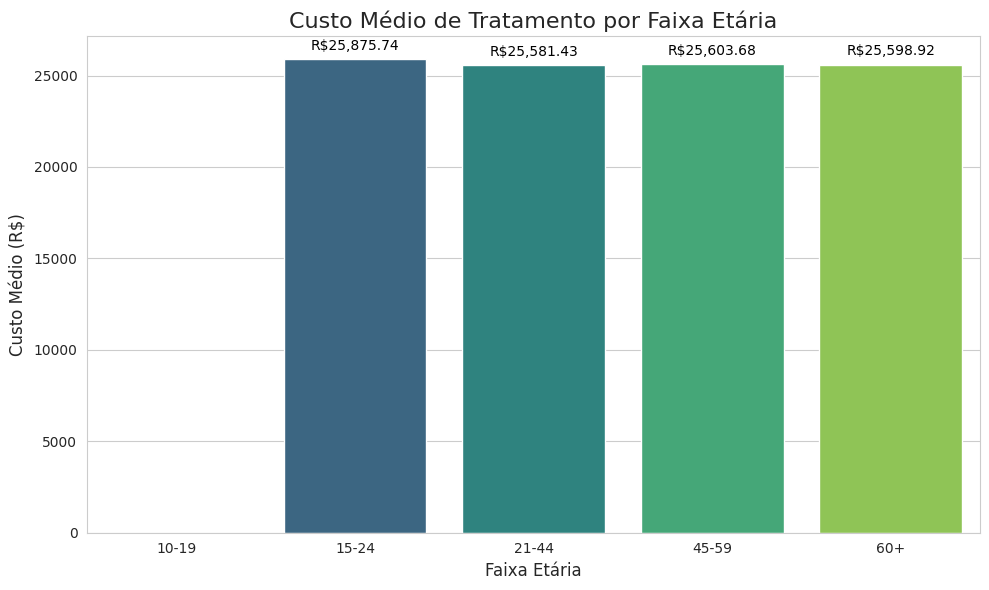

In [ ]:
# Criação das faixas etárias (binning)
# Definindo os limites das faixas etárias
bins = [10, 15, 21, 45, 60, 100]
labels = ['10-19', '15-24', '21-44', '45-59', '60+']
df_clean['Age Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Cálculo do custo médio por faixa etária
average_cost_by_group = df_clean.groupby('Age Group')['Billing Amount'].mean().reset_index()

# Visualização dos dados com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Billing Amount', data=average_cost_by_group, palette='viridis')

# Adicionando rótulos e título
plt.title('Custo Médio de Tratamento por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Custo Médio (R$)', fontsize=12)

# Melhorando a apresentação dos valores no gráfico
for index, row in average_cost_by_group.iterrows():
    plt.text(index, row['Billing Amount'] + 500, f'R${row["Billing Amount"]:,.2f}', color='black', ha="center")

# Exibindo o gráfico
plt.tight_layout()
plt.show()


5.2 Existe diferença significativa de custo entre gêneros?
    Não há evidência de uma diferença estatisticamente significativa de custo entre os gêneros (p >= 0.05).

5.3 Qual seguradora/hospital apresenta mais pacientes internados?
    A seguradora que apresenta mais pacientes é a Cigna com total de 11.139 internações.

DataFrame original:
                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
49995        JOSepH PaUl   64    Male         O+      Hypertension   
49996     braDleY dAniEL   69    Male         B+            Cancer   
49997       LiSa sIMPsoN   73    Male         O-            Cancer   
49998      RoGER farRELl   81    Male         B-            Cancer   
49999  kaTheRIne WeBSTer   23    Male         B+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and

/tmp/ipython-input-2224305622.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seguradora', y='Total Pacientes', data=contagem_seguradora, palette='viridis')


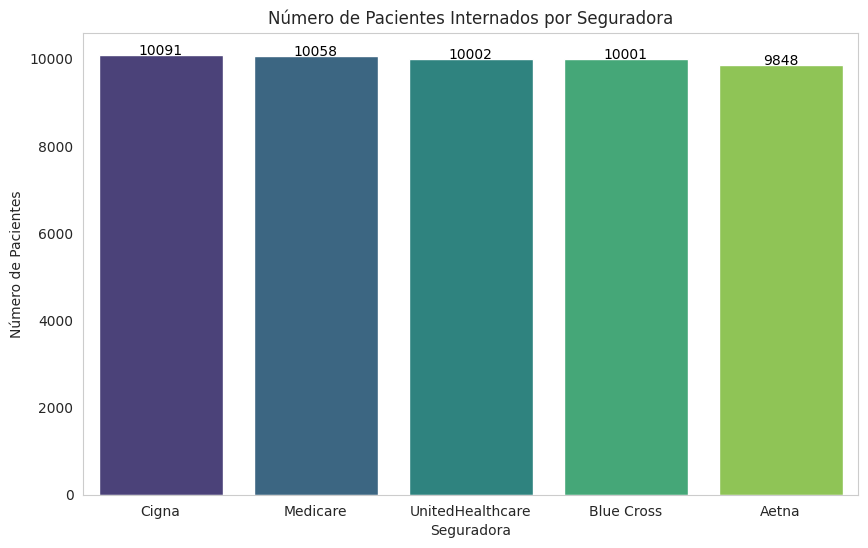

In [ ]:
print("DataFrame original:")
print(df_clean)
print("-" * 30)

# 2. Análise e Preparação dos Dados
# Contar pacientes por seguradora
contagem_seguradora = df_clean['Insurance Provider'].value_counts().reset_index()
contagem_seguradora.columns = ['Seguradora', 'Total Pacientes']

print("Contagem por Seguradora:")
print(contagem_seguradora)
print("-" * 30)

# 3. Geração do Gráfico para Seguradoras (usando Seaborn para facilidade)
plt.figure(figsize=(10, 6))
sns.barplot(x='Seguradora', y='Total Pacientes', data=contagem_seguradora, palette='viridis')
plt.title('Número de Pacientes Internados por Seguradora')
plt.xlabel('Seguradora')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y')
# Adiciona os valores exatos nas barras
for index, row in contagem_seguradora.iterrows():
    plt.text(index, row['Total Pacientes'], round(row['Total Pacientes'], 2), color='black', ha="center")
plt.show()

5.4 Gráfico de dispersão (scatter) entre idade e custo.
    Identificado que não há uma tendência porque os pontos estão espalhados aleatoriamente pelo gráfico, sem um padrão claro. A idade e o custo não têm uma relação linear aparente.
    Além de não ter uma tendência clara, também não há correlação por causa da dispersão dos pontos.

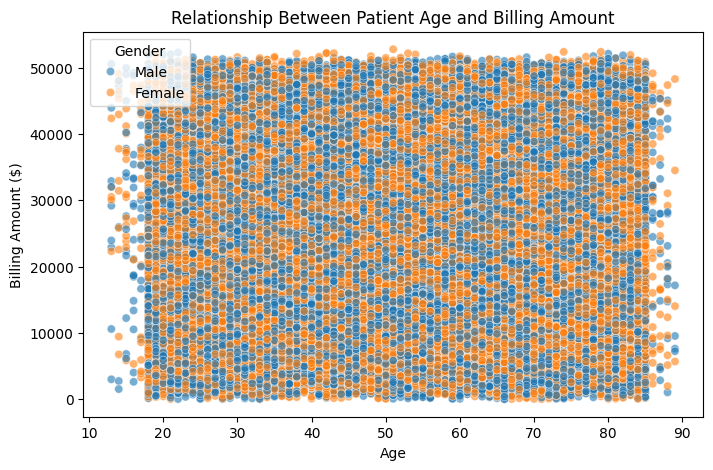

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="Age", y="Billing Amount", hue="Gender", alpha=0.6)
plt.title("Relationship Between Patient Age and Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing Amount ($)")
plt.show()

5.5 Gráfico de pizza com proporção de pacientes por seguradora/hospital.
    
    Feito o gráfico de pizza com a proporção de pacientes por seguradora e os valores foram muito próximos.

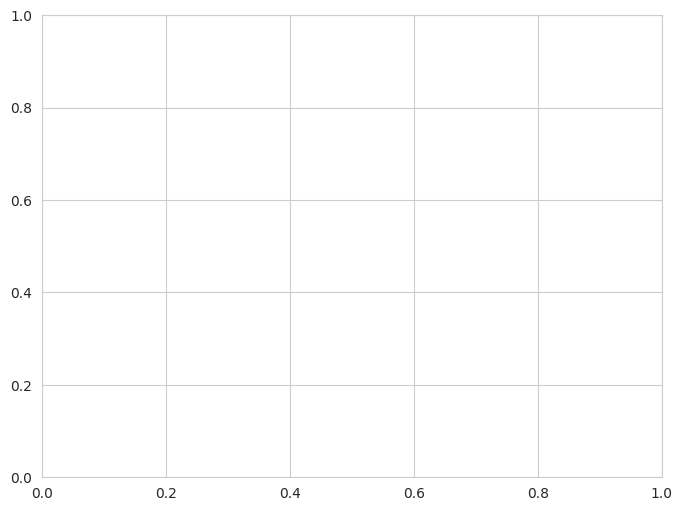

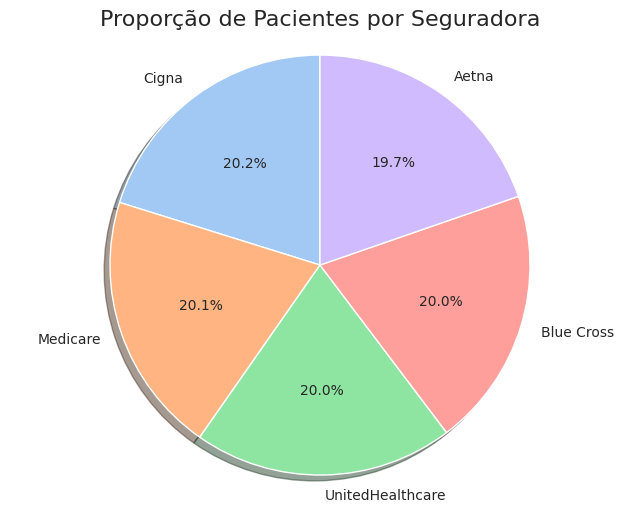

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6)) # Define o tamanho da figura

# Cria o gráfico de pizza
# calcular contagem por seguradora (valores numéricos para o pie)
contagem = df_clean['Insurance Provider'].value_counts()
labels = contagem.index.tolist()
sizes = contagem.values

# paleta com tamanho igual ao número de fatias
paleta_cores = sns.color_palette("pastel", len(labels))

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes,                     # <-- valores numéricos
    labels=labels,             # rótulos
    colors=paleta_cores,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax.set_title('Proporção de Pacientes por Seguradora', fontsize=16)
ax.axis('equal')
plt.show()

2.5 Dataset limpo (df_clean).


In [ ]:
#Exportação arquivo df_clean.csv:
df_clean.to_csv('df_clean.csv', index=False)
print(' ')
print("Arquivo 'df_clean.csv' gerado com sucesso!")

 
Arquivo 'df_clean.csv' gerado com sucesso!


6 - Conclusão e Entrega Final



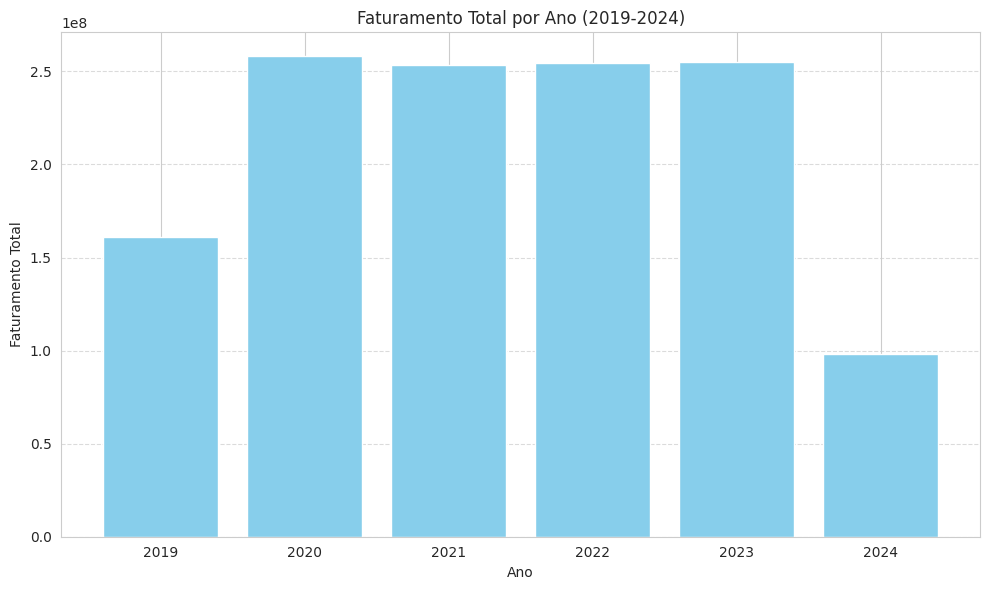

In [ ]:
#Escrever um código python que crie um gráfico a partir de df_clean com o faturamento agrupado por ano, de 2019 até 2024

import pandas as pd
import matplotlib.pyplot as plt

# Pressupondo que df_clean já está carregado e tem colunas 'Data' e 'Faturamento'
# Se os nomes das colunas forem diferentes, substitua 'Data' e 'Faturamento' pelos nomes reais.

# 1. Garantir que a coluna de data seja do tipo datetime (se ainda não for)
df_clean['Discharge Date'] = pd.to_datetime(df_clean['Discharge Date'])

# 2. Filtrar os dados para o intervalo de anos desejado (2019 a 2024)
# Como 2024 pode não estar completo, o filtro garante que apenas dados dentro do período sejam considerados.
df_filtrado = df_clean[
    (df_clean['Discharge Date'].dt.year >= 2019) & (df_clean['Discharge Date'].dt.year <= 2024)
].copy()

# 3. Criar uma nova coluna 'Ano' para agrupar
df_filtrado['Ano'] = df_filtrado['Discharge Date'].dt.year

# 4. Agrupar por ano e somar o faturamento
faturamento_por_ano = df_filtrado.groupby('Ano')['Billing Amount'].sum().reset_index()

# 5. Criar o gráfico de barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.bar(faturamento_por_ano['Ano'], faturamento_por_ano['Billing Amount'], color='skyblue') # Cria o gráfico de barras

# 6. Adicionar títulos e rótulos
plt.title('Faturamento Total por Ano (2019-2024)')
plt.xlabel('Ano')
plt.ylabel('Faturamento Total')
plt.xticks(faturamento_por_ano['Ano']) # Garante que todos os anos sejam mostrados no eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade horizontal suave

# 7. Mostrar o gráfico
plt.tight_layout()
plt.show()



6.1 Quais foram os principais padrões identificados?


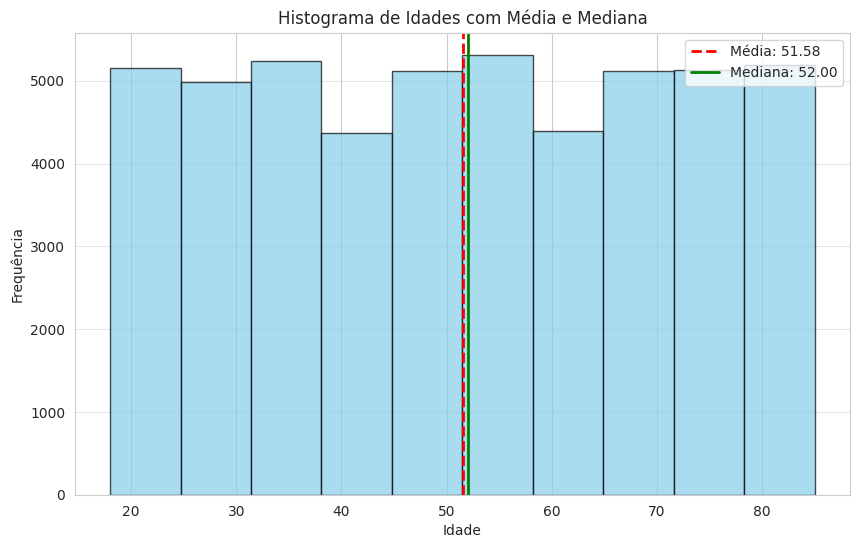

In [ ]:
# Garanta que a coluna 'idade' exista e seja numérica
if 'Age' in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean['Age']):
    # Calcule a média e a mediana
    media = df_clean['Age'].mean()
    mediana = df_clean['Age'].median()

    # Crie o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['Age'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

    # Adicione linhas verticais para a média e a mediana
    plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='solid', linewidth=2, label=f'Mediana: {mediana:.2f}')

    # Adicione títulos e legendas
    plt.title('Histograma de Idades com Média e Mediana')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(axis='y', alpha=0.5)

    # Mostre o gráfico
    plt.show()

else:
    print("A coluna 'Age' não foi encontrada ou não é numérica no DataFrame df_clean.")

6.2 Houve algum comportamento inesperado nos dados?
    
    -> 106 registros com a coluna 'Billing Amount', valor cobrado, negativos
    -> 5500 registros com duplicidade considerando as colunas 'Name' e 'Date of Admission' sendo que a única diferença entre os registros no healthcare_dataset.csv era a coluna 'Age', o que pode interferir na cobrança, já que estamos falando de internação de pacientes via convênio de saúde e o valor varia de acordo com faixa etária.

6.3 Quais hipósteses podem ser exploradas em futuras análises? Inclua pelo menos 3 visualizações comentadas.

6.3.1 O "Faturamento Total Agrupado por Bimestre (2019-2024)" demonstra que no último bimestre de 2024 há uma queda no faturamento, isso deve ser acompanhado e sinalizado para a diretoria da empresa após validação dos valores.

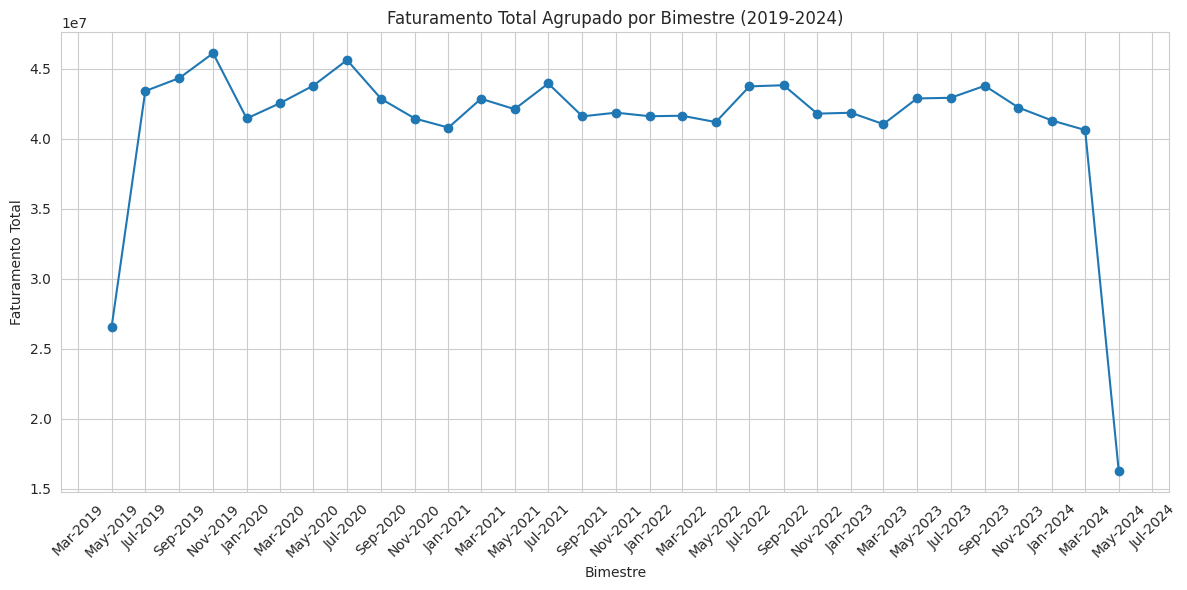

In [ ]:
#Escrever um código python que crie um gráfico a partir de df_clean com o faturamento agrupado por bimestre, de 2019 até 2024

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supondo que df_clean já está carregado.
# Exemplo de criação de dados fictícios para demonstração:
# df_clean = pd.DataFrame({
#     'Data': pd.to_datetime(pd.date_range(start='2019-01-01', end='2024-10-31', freq='D')),
#     'Faturamento': [100 * i for i in range(len(pd.date_range(start='2019-01-01', end='2024-10-31', freq='D')))]
# })
# df_clean.at[df_clean.index[-1], 'Faturamento'] = 500000 # Valor alto para visualização

# 1. Garantir que a coluna de data seja do tipo datetime
df_clean['Discharge Date'] = pd.to_datetime(df_clean['Discharge Date'])

# 2. Filtrar os dados para o período de 2019 a 2024
df_filtrado = df_clean[(df_clean['Discharge Date'].dt.year >= 2019) & (df_clean['Discharge Date'].dt.year <= 2024)]

# 3. Agrupar por bimestre.
# Usamos '2M' como frequência para 2 meses (bimestre) e somamos o faturamento.
# 'MS' define a agregação para o início do mês para melhor rotulagem no gráfico.
faturamento_bimestral = df_filtrado.set_index('Discharge Date').resample('2MS')['Billing Amount'].sum().reset_index()

# 4. Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(faturamento_bimestral['Discharge Date'], faturamento_bimestral['Billing Amount'], marker='o', linestyle='-')

# 5. Personalizar o gráfico
plt.title('Faturamento Total Agrupado por Bimestre (2019-2024)')
plt.xlabel('Bimestre')
plt.ylabel('Faturamento Total')
plt.grid(True)
plt.xticks(rotation=45)

# Formatar os eixos X para mostrar o ano e o bimestre de forma clara
ax = plt.gca()
# Localizador para definir onde os ticks devem aparecer (a cada 2 meses)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# Formatador para definir o formato do rótulo (ex: Jan-2019)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


# 6. Exibir o gráfico
plt.tight_layout() # Ajusta automaticamente os parâmetros de plotagem para preenchimento da figura
plt.show()


6.3.2 No gráfico de dispersão "Relationship Between Patient Age and Billing Amount", Gráfico de dispersão (scatter) entre idade e custo. Identificado que não há uma tendência porque os pontos estão espalhados aleatoriamente pelo gráfico, sem um padrão claro. A idade e o custo não têm uma relação linear aparente. Além de não ter uma tendência clara, também não há correlação por causa da dispersão dos pontos. Este ponto deve ser analisado visto que os convênios possuem faixa de idade para cobrança dos usuários.

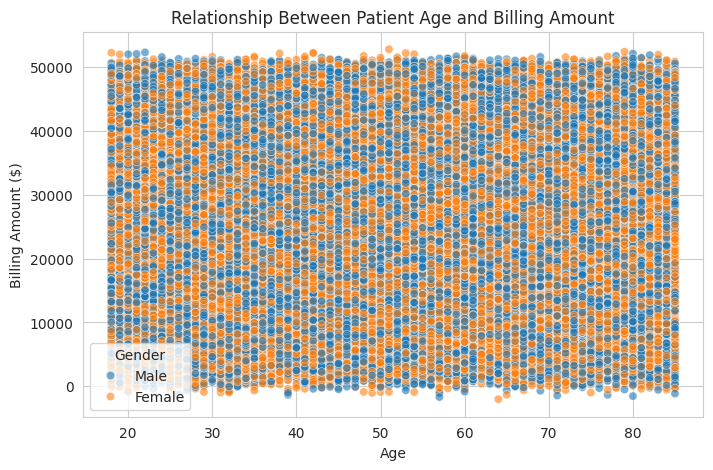

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="Age", y="Billing Amount", hue="Gender", alpha=0.6)
plt.title("Relationship Between Patient Age and Billing Amount")
plt.xlabel("Age")
plt.ylabel("Billing Amount ($)")
plt.show()

6.3.3 Também no gráfico 'Distribuição de Custos por Gênero' não há diferença   estatística significativa de custo entre os gêneros (p >= 0.05). Históricamente mulheres cuidam melhor da saúde do que homens, isso pode refletir em custos de internação, sugiro acompanhar esta diferença agrupando além do gênero do paciente também a idade para melhor comparar os dados.

/tmp/ipython-input-930841183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y='Billing Amount', data=df_clean, palette='pastel')


                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
49995        JOSepH PaUl   64    Male         O+      Hypertension   
49996     braDleY dAniEL   69    Male         B+            Cancer   
49997       LiSa sIMPsoN   73    Male         O-            Cancer   
49998      RoGER farRELl   81    Male         B-            Cancer   
49999  kaTheRIne WeBSTer   23    Male         B+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

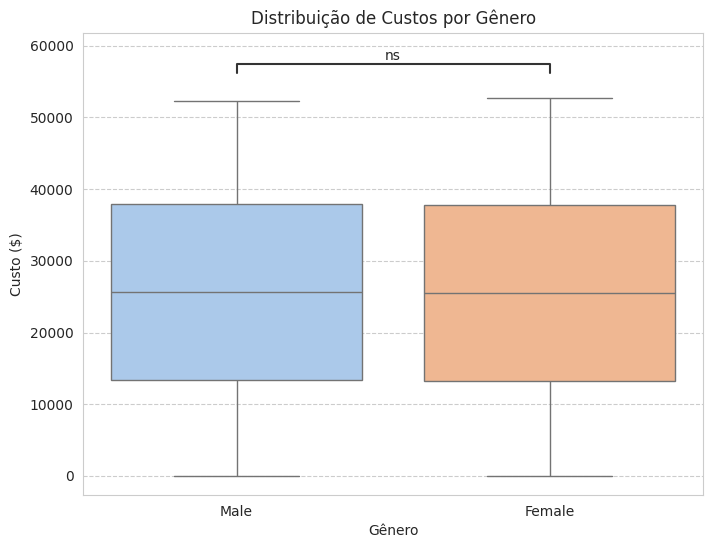

Valor-p do teste t: 0.2840
Não há evidência de uma diferença estatisticamente significativa de custo entre os gêneros (p >= 0.05).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install statannotations # This line was added in the previous turn to address a potential ModuleNotFoundError
from statannotations.Annotator import Annotator

# Visualização com Seaborn (Box Plot)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Gender', y='Billing Amount', data=df_clean, palette='pastel')
plt.title('Distribuição de Custos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Custo ($)')
plt.grid(axis='y', linestyle='--')

# Análise e Anotação Estatística (Opcional, mas altamente recomendado)
# Calcula o valor-p (usando teste t de Student para amostras independentes)
male_costs = df_clean[df_clean['Gender'] == 'Male']['Billing Amount']
female_costs = df_clean[df_clean['Gender'] == 'Female']['Billing Amount']
statistic, pvalue = stats.ttest_ind(male_costs, female_costs)

# Adiciona a anotação de significância estatística ao plot
pairs = [("Male", "Female")] # Corrected syntax error here
annotator = Annotator(ax, pairs, data=df_clean, x='Gender', y='Billing Amount')
#annotator.configure(pvalue_format="p-value", loc="outside")

print (df_clean)
annotator.set_pvalues([pvalue])
annotator.annotate()

plt.show()

# Interpretação do Resultado
print(f"Valor-p do teste t: {pvalue:.4f}")
if pvalue < 0.05:
    print("Existe uma diferença estatisticamente significativa de custo entre os gêneros (p < 0.05).")
else:
    print("Não há evidência de uma diferença estatisticamente significativa de custo entre os gêneros (p >= 0.05).")

6.4 Salve o notebook final como mini_projeto_clamed.ipynb